In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade "mxnet<2.0.0"
!pip install --pre autogluon

In [ ]:
import pandas as pd
from collections import Counter

path = './drive/MyDrive/Materiale_Pellegrino_personal/NSLKDD/NSLKDD_Full.csv'
dataset = pd.read_csv(path)

### ***PRE-ELABORAZIONE DATI***

In [ ]:
from sklearn.model_selection import train_test_split

# train 50% e test 50%
train, test = train_test_split(dataset, test_size=0.5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder delle due variabili target, quindi da stringhe a interi sia in test che in train e salvo i valori nelle variabili y_test a y_train
# y_test viene utilizzata per la valutazione del modello

y_train_bin = LabelEncoder().fit_transform(train['binlabel'])
y_train = LabelEncoder().fit_transform(train['label'])
y_test_bin = LabelEncoder().fit_transform(test['binlabel'])
y_test = LabelEncoder().fit_transform(test['label'])

# tolgo la colonna 'binlabel' perché è una sotto variabile target
train = train.drop(['binlabel'], axis=1)
test = test.drop(['binlabel'], axis=1)

# sostituisco i valori originari con la codifica precedentemente fatta
target_index = train.columns.get_loc('label')
train.iloc[:, target_index] = y_train

# elimino la colonna relativa al target nel dataset di test poiché non utile
test = test.drop('label', axis=1)

In [ ]:
train

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
116381,0,tcp,http,SF,294,1701,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0,21,2
97396,0,tcp,http,SF,321,12687,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,12,0.0,0.00,0.0,0.0,1.00,0.00,0.00,168,255,1.00,0.00,0.01,0.01,0.00,0.00,0.0,0.0,21,2
12752,0,tcp,http,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1.0,1.00,0.0,0.0,1.00,0.00,0.00,2,2,1.00,0.00,0.50,0.00,1.00,1.00,0.0,0.0,17,0
94101,0,tcp,mtp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,4,1.0,1.00,0.0,0.0,0.02,0.06,0.00,255,11,0.04,0.06,0.00,0.00,1.00,1.00,0.0,0.0,19,0
9226,0,tcp,finger,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,14,1.0,1.00,0.0,0.0,0.27,0.08,0.00,132,39,0.26,0.03,0.01,0.05,1.00,0.87,0.0,0.0,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57493,0,tcp,http,SF,210,1242,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.09,0.0,0.0,1.00,0.00,0.27,24,255,1.00,0.00,0.08,0.04,0.00,0.02,0.0,0.0,21,2
29732,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,8,35,1.00,0.00,1.00,0.09,0.00,0.00,0.0,0.0,11,3
121787,0,udp,private,SF,207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,240,200,0.83,0.01,0.83,0.00,0.00,0.00,0.0,0.0,10,1
79305,0,tcp,http,SF,210,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,16,0.0,0.00,0.0,0.0,1.00,0.00,0.19,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,21,2


In [ ]:
test

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
11853,0,tcp,http,SF,227,3552,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,41,0.00,0.0,0.00,0.0,1.00,0.00,0.10,103,255,1.00,0.00,0.01,0.03,0.00,0.0,0.00,0.00,21
674,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,4,4,0.00,0.0,0.00,0.0,1.00,0.00,0.00,4,4,1.00,0.00,0.25,0.00,0.00,0.0,0.00,0.00,10
113027,0,tcp,ftp_data,SF,8766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255,31,0.12,0.01,0.12,0.00,0.66,0.0,0.00,0.00,17
69930,0,tcp,uucp_path,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,13,1.00,1.0,0.00,0.0,0.06,0.06,0.00,255,13,0.05,0.09,0.00,0.00,1.00,1.0,0.00,0.00,20
46774,0,tcp,other,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,1,0.15,0.0,0.85,1.0,0.00,1.00,0.00,255,1,0.00,1.00,0.00,0.00,0.13,0.0,0.87,1.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80694,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,1,0.11,0.0,0.88,1.0,0.01,1.00,0.00,255,1,0.00,0.85,0.00,0.00,0.07,0.0,0.64,1.00,19
109541,0,tcp,imap4,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247,18,1.00,1.0,0.00,0.0,0.07,0.06,0.00,255,19,0.07,0.07,0.00,0.00,1.00,1.0,0.00,0.00,19
34421,0,tcp,http,SF,199,2067,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.00,21
95204,0,tcp,http,SF,459,3395,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0.00,0.0,0.00,0.0,1.00,0.00,0.75,6,255,1.00,0.00,0.17,0.07,0.00,0.0,0.00,0.04,21


### ***MODEL***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import random
from autogluon.tabular import TabularPredictor
import mxnet as mx

In [ ]:
label = 'label'

train_df = train
test_df = test

print('Number of training samples:', len(train_df))
print('Number of test samples:', len(test_df))

Number of training samples: 74258
Number of test samples: 74258


In [ ]:
test_df

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
11853,0,tcp,http,SF,227,3552,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,41,0.00,0.0,0.00,0.0,1.00,0.00,0.10,103,255,1.00,0.00,0.01,0.03,0.00,0.0,0.00,0.00,21
674,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,4,4,0.00,0.0,0.00,0.0,1.00,0.00,0.00,4,4,1.00,0.00,0.25,0.00,0.00,0.0,0.00,0.00,10
113027,0,tcp,ftp_data,SF,8766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255,31,0.12,0.01,0.12,0.00,0.66,0.0,0.00,0.00,17
69930,0,tcp,uucp_path,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,13,1.00,1.0,0.00,0.0,0.06,0.06,0.00,255,13,0.05,0.09,0.00,0.00,1.00,1.0,0.00,0.00,20
46774,0,tcp,other,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,1,0.15,0.0,0.85,1.0,0.00,1.00,0.00,255,1,0.00,1.00,0.00,0.00,0.13,0.0,0.87,1.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80694,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,1,0.11,0.0,0.88,1.0,0.01,1.00,0.00,255,1,0.00,0.85,0.00,0.00,0.07,0.0,0.64,1.00,19
109541,0,tcp,imap4,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247,18,1.00,1.0,0.00,0.0,0.07,0.06,0.00,255,19,0.07,0.07,0.00,0.00,1.00,1.0,0.00,0.00,19
34421,0,tcp,http,SF,199,2067,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.00,21
95204,0,tcp,http,SF,459,3395,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0.00,0.0,0.00,0.0,1.00,0.00,0.75,6,255,1.00,0.00,0.17,0.07,0.00,0.0,0.00,0.04,21


In [ ]:
train_df

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
116381,0,tcp,http,SF,294,1701,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0,21,2
97396,0,tcp,http,SF,321,12687,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,12,0.0,0.00,0.0,0.0,1.00,0.00,0.00,168,255,1.00,0.00,0.01,0.01,0.00,0.00,0.0,0.0,21,2
12752,0,tcp,http,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1.0,1.00,0.0,0.0,1.00,0.00,0.00,2,2,1.00,0.00,0.50,0.00,1.00,1.00,0.0,0.0,17,0
94101,0,tcp,mtp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,4,1.0,1.00,0.0,0.0,0.02,0.06,0.00,255,11,0.04,0.06,0.00,0.00,1.00,1.00,0.0,0.0,19,0
9226,0,tcp,finger,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,14,1.0,1.00,0.0,0.0,0.27,0.08,0.00,132,39,0.26,0.03,0.01,0.05,1.00,0.87,0.0,0.0,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57493,0,tcp,http,SF,210,1242,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.09,0.0,0.0,1.00,0.00,0.27,24,255,1.00,0.00,0.08,0.04,0.00,0.02,0.0,0.0,21,2
29732,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,8,35,1.00,0.00,1.00,0.09,0.00,0.00,0.0,0.0,11,3
121787,0,udp,private,SF,207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,240,200,0.83,0.01,0.83,0.00,0.00,0.00,0.0,0.0,10,1
79305,0,tcp,http,SF,210,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,16,0.0,0.00,0.0,0.0,1.00,0.00,0.19,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,21,2


In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label)

predictor.fit(train_df, hyperparameters='multimodal')

No path specified. Models will be saved in: "AutogluonModels/ag-20210503_154737/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210503_154737/"
AutoGluon Version:  0.2.1b20210503
Train Data Rows:    74258
Train Data Columns: 42
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [2, 0, 1, 3, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12618.72 MB
	Train Data (Original)  Memory Usage: 36.66 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set f

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.9992       0.148030   72.375574                0.001259           0.471988            2       True          7
1           LightGBMXT     0.9988       0.130505    9.150251                0.130505           9.150251            1       True          2
2              XGBoost     0.9980       0.036257   20.793412                0.036257          20.793412            1       True          4
3       NeuralNetMXNet     0.9972       0.344826  342.434387                0.344826         342.434387            1       True          5
4             CatBoost     0.9968       0.016265   62.753335                0.016265          62.753335            1       True          3
5        LightGBMLarge     0.9968       0.032545    4.415701                0.032545           4.415701 

{'leaderboard':                  model  score_val  ...  can_infer  fit_order
 0  WeightedEnsemble_L2     0.9992  ...       True          7
 1           LightGBMXT     0.9988  ...       True          2
 2              XGBoost     0.9980  ...       True          4
 3       NeuralNetMXNet     0.9972  ...       True          5
 4             CatBoost     0.9968  ...       True          3
 5        LightGBMLarge     0.9968  ...       True          6
 6             LightGBM     0.9968  ...       True          1
 
 [7 rows x 9 columns],
 'max_stack_level': 2,
 'model_best': 'WeightedEnsemble_L2',
 'model_fit_times': {'CatBoost': 62.75333547592163,
  'LightGBM': 6.058074474334717,
  'LightGBMLarge': 4.415701389312744,
  'LightGBMXT': 9.150250673294067,
  'NeuralNetMXNet': 342.43438744544983,
  'WeightedEnsemble_L2': 0.4719882011413574,
  'XGBoost': 20.79341220855713},
 'model_hyperparams': {'CatBoost': {'allow_writing_files': False,
   'eval_metric': 'Accuracy',
   'iterations': 10000,
   'lea

### ***PREDICTION***

In [ ]:
""" Per la predizione e la valutazione uso solo la Rete Neurale tra tutti i modelli addestrati """

models = predictor.get_model_names()
nn_name = models[4]
nn_name

# predizione usando solo NeuralNetMXNet
y_pred = predictor.predict(test_df, model=nn_name)
y_pred

11853     2
674       0
113027    2
69930     0
46774     1
         ..
80694     1
109541    0
34421     2
95204     2
86028     1
Name: label, Length: 74258, dtype: int64

In [ ]:
# Introduco nuovamente la colonna target in test e faccio una previsione con tutti i modelli
test = test.assign(label=y_test)
predictor.leaderboard(test)

                 model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           LightGBMXT    0.998303     0.9988        3.826686       0.130505    9.150251                 3.826686                0.130505           9.150251            1       True          2
1  WeightedEnsemble_L2    0.998074     0.9992        4.034363       0.148030   72.375574                 0.009009                0.001259           0.471988            2       True          7
2             LightGBM    0.997859     0.9968        1.023938       0.040408    6.058074                 1.023938                0.040408           6.058074            1       True          1
3        LightGBMLarge    0.996579     0.9968        0.693712       0.032545    4.415701                 0.693712                0.032545           4.415701            1       True          6
4              XGBoost    0.996000     0

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.998303,0.9988,3.826686,0.130505,9.150251,3.826686,0.130505,9.150251,1,True,2
1,WeightedEnsemble_L2,0.998074,0.9992,4.034363,0.148030,72.375574,0.009009,0.001259,0.471988,2,True,7
2,LightGBM,0.997859,0.9968,1.023938,0.040408,6.058074,1.023938,0.040408,6.058074,1,True,1
3,LightGBMLarge,0.996579,0.9968,0.693712,0.032545,4.415701,0.693712,0.032545,4.415701,1,True,6
4,XGBoost,0.996000,0.9980,1.062145,0.036257,20.793412,1.062145,0.036257,20.793412,1,True,4
5,CatBoost,0.992540,0.9968,0.198668,0.016265,62.753335,0.198668,0.016265,62.753335,1,True,3
6,NeuralNetMXNet,0.989132,0.9972,6.683432,0.344826,342.434387,6.683432,0.344826,342.434387,1,True,5


### ***EVALUATION NEURALNET***


In [ ]:
count_test = []
for i in y_test:
    count_test.append(i)

count_pred = []
for i in y_pred:
    count_pred.append(i)
    
print('Test:', Counter(count_test))
print('Pred:', Counter(count_pred))

Test: Counter({2: 38648, 0: 26448, 1: 7040, 3: 2061, 4: 61})
Pred: Counter({2: 38591, 0: 26483, 1: 7475, 3: 1648, 4: 61})


In [ ]:
# Matrice di confusione, accuracy, classification_report
from sklearn.metrics import *

# y_test è la variabile che contiene i valori effettivi
# y_pred contiene i valori predetti dal modello
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
# non presente nella libreria, calcolo mediante formula
f2 = (1+2**2)*((precision*recall)/((2**2*precision)+recall))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels={'Dos': 0, 'Probe': 1, 'normal': 2, 'r2l': 3, 'u2r': 4} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


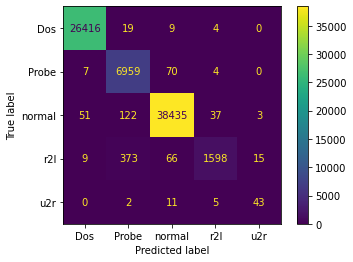

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

target_dict = {'Dos' : 0,
               'Probe' : 1,
               'normal' : 2,
               'r2l' : 3,
               'u2r' : 4}

disp = ConfusionMatrixDisplay(cm, target_dict)
disp.plot()

In [ ]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[[47743    67]
  [   32 26416]]

 [[66702   516]
  [   81  6959]]

 [[35454   156]
  [  213 38435]]

 [[72147    50]
  [  463  1598]]

 [[74179    18]
  [   18    43]]]


In [ ]:
print(cm)

[[26416    19     9     4     0]
 [    7  6959    70     4     0]
 [   51   122 38435    37     3]
 [    9   373    66  1598    15]
 [    0     2    11     5    43]]


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26448
           1       0.93      0.99      0.96      7040
           2       1.00      0.99      1.00     38648
           3       0.97      0.78      0.86      2061
           4       0.70      0.70      0.70        61

    accuracy                           0.99     74258
   macro avg       0.92      0.89      0.90     74258
weighted avg       0.99      0.99      0.99     74258



In [ ]:
print('Accuracy: ', acc)
print('Precision_weighted: ', precision)
print('Recall_weighted: ', recall)
print('mcc: ', mcc)
print('f2: ', f2)

Accuracy:  0.9891324840421234
Precision_weighted:  0.989366208149847
Recall_weighted:  0.9891324840421234
mcc:  0.981708200822517
f2:  0.9891792200289956
